In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sce = 'Scenario 3'
if sce == 'Scenario 1':
    print('S1')
    x_pow, y_pow = 0.5, 2
elif sce == 'Scenario 2':
    print('S2')
    x_pow, y_pow = 4, 2
elif sce == 'Scenario 3':
    print('S3')
    x_pow, y_pow = 0.5, 0.5
elif sce == 'Scenario 4':
    print('S4')
    x_pow, y_pow = 2, 0.5
else:
    print('Not Supported Scenrio')

S3


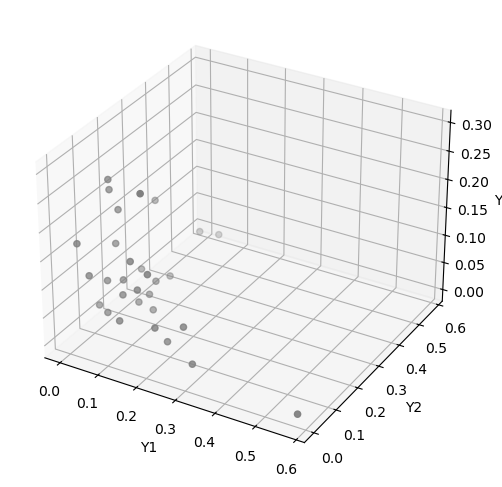

[[8.10083664e-02 1.61395260e-01 3.04228468e-02]
 [1.07654607e-01 1.78984927e-01 1.53925360e-02]
 [3.97817164e-02 2.69949073e-02 1.17772896e-01]
 [5.98661728e-02 6.59839858e-02 4.21707478e-02]
 [1.00187177e-01 6.76463412e-02 8.17802473e-02]
 [2.54405838e-02 2.62016915e-01 4.30583749e-02]
 [2.19859273e-01 5.83814280e-02 2.69119674e-02]
 [8.62805786e-03 1.10237015e-01 2.85833059e-02]
 [1.37793060e-01 4.29136674e-02 1.57265189e-01]
 [7.02129548e-02 1.16840793e-01 8.44944136e-02]
 [1.33049844e-01 1.57471868e-03 6.67268958e-02]
 [9.20640278e-02 2.17429015e-01 5.03455936e-02]
 [5.77851500e-01 3.43029273e-03 2.49493657e-04]
 [1.92152697e-01 2.60076546e-02 1.51718755e-01]
 [5.09393360e-02 8.20969630e-02 9.17477327e-02]
 [1.44037240e-02 2.14367215e-02 1.70871680e-01]
 [5.73182088e-02 3.33720746e-01 1.10584975e-02]
 [1.33224903e-02 1.52770284e-01 2.38102059e-01]
 [2.13847947e-01 1.74552655e-02 6.55876690e-02]
 [1.51649797e-01 4.71056895e-02 1.08503626e-01]
 [2.71324283e-02 1.55448002e-01 1.272725

In [143]:
def generate_data_with_custom_outputs(n_points, n_outputs, on_frontier_percentage, r, x_pow, y_pow, plotting=False):
    """
    Generate data points for a customizable number of outputs.

    :param n_points: Total number of points to generate.
    :param n_outputs: Number of output dimensions.
    :param on_frontier_percentage: Percentage of points that are on the production frontier.
    :param r: The radius or scale factor for the production possibility space.
    :return: A numpy array of generated points.
    """
    n_points_frontier = int(np.ceil(n_points * on_frontier_percentage))
    n_points_inside = n_points - n_points_frontier

    # Generate points inside the production possibility space
    points_inside = []
    for p in range(n_points_inside):
        while True:
            point = np.random.uniform(0, r, n_outputs)
            if np.sum(point**y_pow) <= r**x_pow:
                points_inside.append(point)
                break

    # Generate points on the production frontier
    points_frontier = []
    for _ in range(n_points_frontier):
        # Distribute r^2 among the outputs
        remaining = r**x_pow
        point = np.zeros(n_outputs)
        for i in range(n_outputs - 1):
            point[i] = np.random.uniform(0, remaining)
            remaining -= point[i]
        point[-1] = remaining  # Assign the remaining value to the last output
        np.random.shuffle(point)  # Shuffle to ensure random distribution among outputs
        points_frontier.append(point**(1 / y_pow))  # Take the square root to meet the frontier condition


    # Combine the points into a single array
    all_points = np.vstack((points_inside, points_frontier))
    
    if plotting and n_outputs==3:
        # Create a new 3D figure
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')

        # Plot the points inside the shape
        ax.scatter(all_points[:, 0], all_points[:, 1], all_points[:, 2], color='gray')

    #     # Plot the points on the frontier
    #     ax.scatter(points_frontier[:, 0], points_frontier[:, 1], points_frontier[:, 2], color='green')

        # Set labels
        ax.set_xlabel('Y1')
        ax.set_ylabel('Y2')
        ax.set_zlabel('Y3')

        # Show the plot
        plt.show()

    return all_points

# Example usage:
n_points = 30
n_outputs = 3  # For example, 4 outputs
on_frontier_percentage = 0.2
r = 1

data = generate_data_with_custom_outputs(n_points, n_outputs, on_frontier_percentage, r, x_pow=x_pow, y_pow=y_pow, plotting=True)
print(data)


In [144]:
df_data = pd.DataFrame(np.array(data).reshape(len(data),3), columns=['y1','y2','y3'])

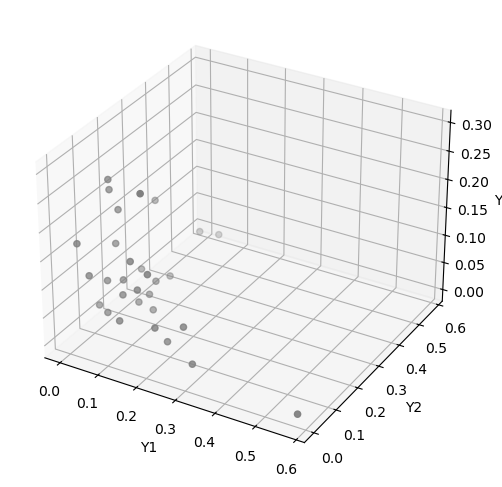

In [145]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points inside the shape
ax.scatter(df_data['y1'], df_data['y2'], df_data['y3'], color='gray')

#     # Plot the points on the frontier
#     ax.scatter(points_frontier[:, 0], points_frontier[:, 1], points_frontier[:, 2], color='green')

# Set labels
ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')

# Show the plot
plt.show()

In [146]:
def gen_output_with_var_cost(n_points=10):
    # Define the radii
    all_output = []
    radius = np.linspace(0.01, 3, 3)
    print(radius, x_pow, y_pow)
    for r in radius:
        print('r=',r)
        level_output = generate_data_with_custom_outputs(n_points=n_points, n_outputs=3, on_frontier_percentage=0.333, 
                                                         r=r, x_pow=x_pow, y_pow=y_pow, plotting=True)
        all_output.append(level_output)
    return all_output

[0.01  1.505 3.   ] 0.5 0.5
r= 0.01


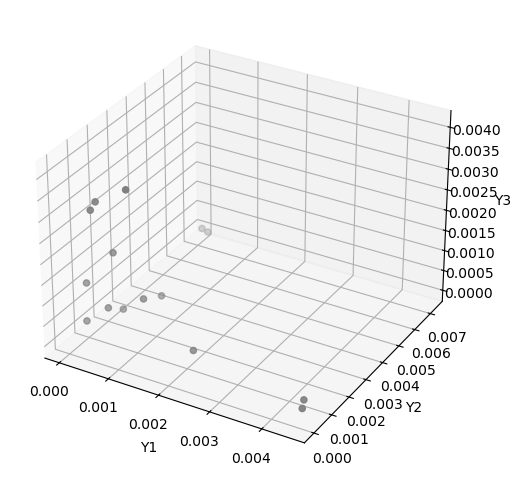

r= 1.5050000000000001


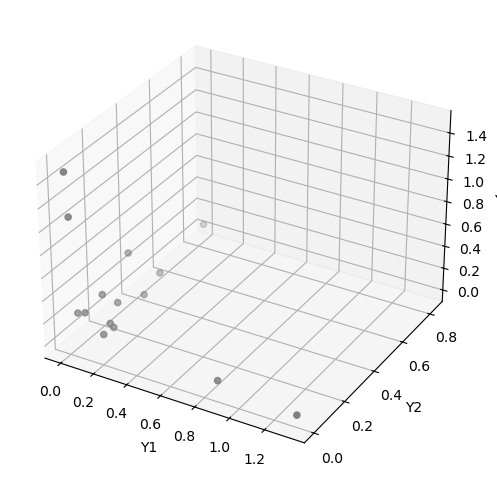

r= 3.0


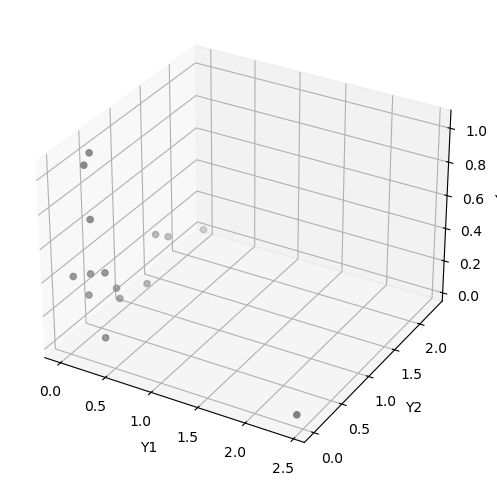

0.010000000000000002
0.010000000000000002
0.010000000000000002
0.010000000000000002
0.010000000000000002
0.010000000000000002
0.010000000000000002
0.010000000000000002
0.010000000000000002
0.010000000000000002
0.010000000000000002
0.010000000000000002
0.010000000000000002
0.010000000000000002
0.010000000000000002
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
1.5050000000000003
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996
2.9999999999999996


In [147]:
all_output = gen_output_with_var_cost(n_points=15)
all_output_with_input = []
eff_mode = 'max'
for output in all_output:
    level_output_with_input = []
    for y1, y2, y3 in output:
        if eff_mode == 'max':
            eff = np.max([ (y2**y_pow + y1**y_pow + y3**y_pow)**(1/x_pow) for y1, y2, y3 in output])
        else:
            eff = 0
        print(eff)
        output_with_input = [y1, y2, y3, eff]
        level_output_with_input.append(output_with_input)
    all_output_with_input.append(level_output_with_input)

In [148]:
df = pd.DataFrame(np.array(all_output_with_input).reshape(len(all_output_with_input)*len(all_output_with_input[0]),4), columns=['y1','y2','y3','x'])
df.index = ['DMU ' + str(i) for i in df.index]
df

,y1,y2,y3,x
DMU 0,0.000485,8.422244e-04,0.000705,0.010
DMU 1,0.000054,8.356208e-04,0.001159,0.010
DMU 2,0.002205,7.879858e-04,0.000340,0.010
DMU 3,0.000135,5.951299e-04,0.000348,0.010
DMU 4,0.000519,3.497089e-05,0.003366,0.010
DMU 5,0.004476,3.008638e-04,0.000046,0.010
DMU 6,0.004366,7.179477e-04,0.000027,0.010
DMU 7,0.001071,1.184983e-03,0.001007,0.010
DMU 8,0.000805,2.811792e-03,0.000339,0.010
DMU 9,0.000357,1.918669e-03,0.000193,0.010


In [149]:
df['real_x'] = (df['y2']**y_pow + df['y1']**y_pow + df['y3']**y_pow)**(1/x_pow)
df

,y1,y2,y3,x,real_x
DMU 0,0.000485,8.422244e-04,0.000705,0.010,0.006023
DMU 1,0.000054,8.356208e-04,0.001159,0.010,0.004946
DMU 2,0.002205,7.879858e-04,0.000340,0.010,0.008733
DMU 3,0.000135,5.951299e-04,0.000348,0.010,0.002987
DMU 4,0.000519,3.497089e-05,0.003366,0.010,0.007519
DMU 5,0.004476,3.008638e-04,0.000046,0.010,0.008283
DMU 6,0.004366,7.179477e-04,0.000027,0.010,0.009617
DMU 7,0.001071,1.184983e-03,0.001007,0.010,0.009779
DMU 8,0.000805,2.811792e-03,0.000339,0.010,0.009962
DMU 9,0.000357,1.918669e-03,0.000193,0.010,0.005867


In [150]:
# df.to_csv('marginal_effect_analysis_NRS.csv')

In [3]:
df = pd.read_csv('marginal_effect_analysis_NRS.csv')

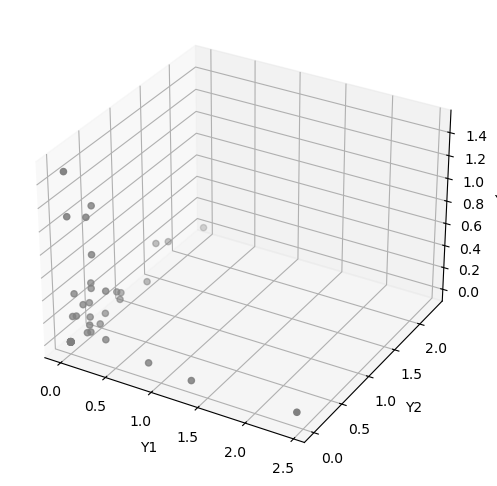

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points inside the shape
ax.scatter(df['y1'], df['y2'], df['y3'], color='gray')

#     # Plot the points on the frontier
#     ax.scatter(points_frontier[:, 0], points_frontier[:, 1], points_frontier[:, 2], color='green')

# Set labels
ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')

# Show the plot
plt.show()

In [5]:
#%%
import dmp
import pandas as pd
import numpy as np
import constant as const
import solver
from load_data import denoise_nonpositive, LIFE141516, LIFE_DUMMY141516, LIFE181920
import time
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#%%

Restricted license - for non-production use only - expires 2025-11-24


In [6]:
transformed_df = df.copy()
transformed_df['class'] = transformed_df.groupby('x').ngroup()
# transformed_df = transformed_df[transformed_df['class']==1]
eff_dict, lambdas_dict, projected_x, projected_y =\
solver.dea_dual(dmu=transformed_df.index, 
                x=np.array(transformed_df[['x']].T), 
                y=np.array(transformed_df[['y1', 'y2', 'y3']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')

# HVI

In [154]:
from pymoo.indicators.hv import HV
from pymoo.problems import get_problem
import numpy as np
# Nested Approach
data = {
    'y1': projected_y[0],
    'y2': projected_y[1],
    'y3': projected_y[2],
    'class': transformed_df['class']
}

df_projected = pd.DataFrame(data)
df_test = df[['y1', 'y2']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y1']].T)+10, 
                y=np.array(tmp_df[['y2']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    




Index(['DMU 0', 'DMU 1', 'DMU 2', 'DMU 3', 'DMU 4', 'DMU 5', 'DMU 6', 'DMU 7',
       'DMU 8', 'DMU 9', 'DMU 10', 'DMU 11', 'DMU 12', 'DMU 13', 'DMU 14',
       'DMU 15', 'DMU 16', 'DMU 17', 'DMU 18', 'DMU 19', 'DMU 20', 'DMU 21',
       'DMU 22', 'DMU 23', 'DMU 24', 'DMU 25', 'DMU 26', 'DMU 27', 'DMU 28',
       'DMU 29', 'DMU 30', 'DMU 31', 'DMU 32', 'DMU 33', 'DMU 34', 'DMU 35',
       'DMU 36', 'DMU 37', 'DMU 38', 'DMU 39', 'DMU 40', 'DMU 41', 'DMU 42',
       'DMU 43', 'DMU 44'],
      dtype='object')
Index(['DMU 0', 'DMU 1', 'DMU 2', 'DMU 3', 'DMU 4', 'DMU 5', 'DMU 6', 'DMU 7',
       'DMU 8', 'DMU 9', 'DMU 10', 'DMU 11', 'DMU 12', 'DMU 13', 'DMU 14',
       'DMU 15', 'DMU 16', 'DMU 17', 'DMU 18', 'DMU 19', 'DMU 20', 'DMU 21',
       'DMU 22', 'DMU 23', 'DMU 24', 'DMU 25', 'DMU 26', 'DMU 27', 'DMU 28',
       'DMU 29', 'DMU 30', 'DMU 31', 'DMU 32', 'DMU 33', 'DMU 34', 'DMU 35',
       'DMU 36', 'DMU 37', 'DMU 38', 'DMU 39', 'DMU 40', 'DMU 41', 'DMU 42',
       'DMU 43', 'DMU 44']

In [155]:
#calculate hvi
df_plot = df_test[df_test['frontier']==0]
hv_points = df_plot[['y1','y2']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))


HV 0.5412172332949153
0.8615965505968233


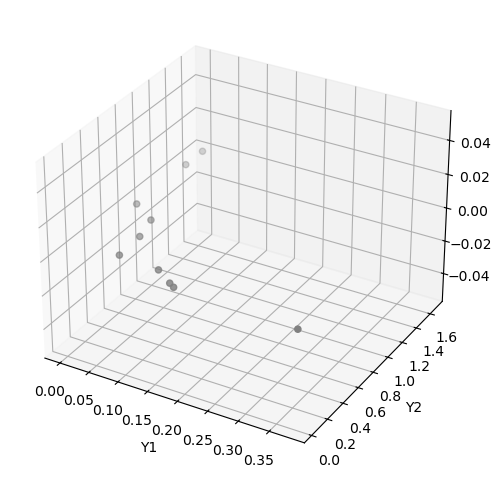

In [156]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points inside the shape
ax.scatter(df_plot['y1'], df_plot['y2'], color='gray')

#     # Plot the points on the frontier
#     ax.scatter(points_frontier[:, 0], points_frontier[:, 1], points_frontier[:, 2], color='green')

# Set labels
ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
# ax.set_zlabel('Y3')

# Show the plot
plt.show()

# Y1-Y2 then Y3

In [157]:
df_test = df[['y1', 'y2']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y1']].T)+10, 
                y=np.array(tmp_df[['y2']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1

#calculate hvi
df_plot = df_test[df_test['frontier']==0]
hv_points = df_plot[['y1','y2']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))

Index(['DMU 0', 'DMU 1', 'DMU 2', 'DMU 3', 'DMU 4', 'DMU 5', 'DMU 6', 'DMU 7',
       'DMU 8', 'DMU 9', 'DMU 10', 'DMU 11', 'DMU 12', 'DMU 13', 'DMU 14',
       'DMU 15', 'DMU 16', 'DMU 17', 'DMU 18', 'DMU 19', 'DMU 20', 'DMU 21',
       'DMU 22', 'DMU 23', 'DMU 24', 'DMU 25', 'DMU 26', 'DMU 27', 'DMU 28',
       'DMU 29', 'DMU 30', 'DMU 31', 'DMU 32', 'DMU 33', 'DMU 34', 'DMU 35',
       'DMU 36', 'DMU 37', 'DMU 38', 'DMU 39', 'DMU 40', 'DMU 41', 'DMU 42',
       'DMU 43', 'DMU 44'],
      dtype='object')
Index(['DMU 0', 'DMU 1', 'DMU 2', 'DMU 3', 'DMU 4', 'DMU 5', 'DMU 6', 'DMU 7',
       'DMU 8', 'DMU 9', 'DMU 10', 'DMU 11', 'DMU 12', 'DMU 13', 'DMU 14',
       'DMU 15', 'DMU 16', 'DMU 17', 'DMU 18', 'DMU 19', 'DMU 20', 'DMU 21',
       'DMU 22', 'DMU 23', 'DMU 24', 'DMU 25', 'DMU 26', 'DMU 27', 'DMU 28',
       'DMU 29', 'DMU 30', 'DMU 31', 'DMU 32', 'DMU 33', 'DMU 34', 'DMU 35',
       'DMU 36', 'DMU 37', 'DMU 38', 'DMU 39', 'DMU 40', 'DMU 41', 'DMU 42',
       'DMU 43', 'DMU 44']

# Y2-Y3 then Y1

In [158]:
df_test = df[['y2', 'y3']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y2']].T)+10, 
                y=np.array(tmp_df[['y3']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1

#calculate hvi
df_plot = df_test[df_test['frontier']==0]
hv_points = df_plot[['y2','y3']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))

Index(['DMU 0', 'DMU 1', 'DMU 2', 'DMU 3', 'DMU 4', 'DMU 5', 'DMU 6', 'DMU 7',
       'DMU 8', 'DMU 9', 'DMU 10', 'DMU 11', 'DMU 12', 'DMU 13', 'DMU 14',
       'DMU 15', 'DMU 16', 'DMU 17', 'DMU 18', 'DMU 19', 'DMU 20', 'DMU 21',
       'DMU 22', 'DMU 23', 'DMU 24', 'DMU 25', 'DMU 26', 'DMU 27', 'DMU 28',
       'DMU 29', 'DMU 30', 'DMU 31', 'DMU 32', 'DMU 33', 'DMU 34', 'DMU 35',
       'DMU 36', 'DMU 37', 'DMU 38', 'DMU 39', 'DMU 40', 'DMU 41', 'DMU 42',
       'DMU 43', 'DMU 44'],
      dtype='object')
Index(['DMU 0', 'DMU 1', 'DMU 2', 'DMU 3', 'DMU 4', 'DMU 5', 'DMU 6', 'DMU 7',
       'DMU 8', 'DMU 9', 'DMU 10', 'DMU 11', 'DMU 12', 'DMU 13', 'DMU 14',
       'DMU 15', 'DMU 16', 'DMU 17', 'DMU 18', 'DMU 19', 'DMU 20', 'DMU 21',
       'DMU 22', 'DMU 23', 'DMU 24', 'DMU 25', 'DMU 26', 'DMU 27', 'DMU 28',
       'DMU 29', 'DMU 30', 'DMU 31', 'DMU 32', 'DMU 33', 'DMU 34', 'DMU 35',
       'DMU 36', 'DMU 37', 'DMU 38', 'DMU 39', 'DMU 40', 'DMU 41', 'DMU 42',
       'DMU 43', 'DMU 44']

# Y1-Y3 then Y2

In [8]:
df_test = df[['y1', 'y3']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y1']].T)+10, 
                y=np.array(tmp_df[['y3']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1

#calculate hvi
df_plot = df_test[df_test['frontier']==0]
hv_points = df_plot[['y1','y3']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)


NameError: name 'HV' is not defined

# Y1-Y2-Y3 HVI

In [9]:
df_test = df[['y1', 'y2', 'y3', 'x', 'real_x']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y1']].T)+10, 
                y=np.array(tmp_df[['y2', 'y3']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1

#calculate hvi
df_plot = df_test[df_test['frontier']==0]
hv_points = df_plot[['y1','y2', 'y3']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)


NameError: name 'HV' is not defined

In [10]:
df_test

,y1,y2,y3,x,real_x,frontier,index
0,0.000485,8.422244e-04,0.000705,0.010,0.006023,6,0
1,0.000054,8.356208e-04,0.001159,0.010,0.004946,6,1
2,0.002205,7.879858e-04,0.000340,0.010,0.008733,4,2
3,0.000135,5.951299e-04,0.000348,0.010,0.002987,7,3
4,0.000519,3.497089e-05,0.003366,0.010,0.007519,4,4
5,0.004476,3.008638e-04,0.000046,0.010,0.008283,3,5
6,0.004366,7.179477e-04,0.000027,0.010,0.009617,3,6
7,0.001071,1.184983e-03,0.001007,0.010,0.009779,4,7
8,0.000805,2.811792e-03,0.000339,0.010,0.009962,4,8
9,0.000357,1.918669e-03,0.000193,0.010,0.005867,5,9


In [11]:
input_levels = df_test['x'].unique()
frontier_levels = np.sort(df_test['frontier'].unique())
frontier_levels

array([0, 1, 2, 3, 4, 5, 6, 7])

In [12]:
import statsmodels.formula.api as sm
# for x_level in input_levels:
for front in frontier_levels:
    # Filter data for the current input level and efficient observations
    # subset = df_plot[df_plot['x'] == x_level]
    subset = df_test[df_test['frontier'] == front]
    
    # print(subset)
    subset['minus_x'] = -subset['real_x']
    # Define the regression formula for three outputs
    formula = "minus_x ~  y1 + y2 + y3 + y1*y2 + y1*y3 + y2*y3"

    # Fit the OLS regression model
    model = sm.ols(formula, data=subset).fit()

    # Extract bij parameters and their p-values
    b12 = model.params["y1:y2"]
    p_value_b12 = model.pvalues["y1:y2"]

    b13 = model.params["y1:y3"]
    p_value_b13 = model.pvalues["y1:y3"]

    b23 = model.params["y2:y3"]
    p_value_b23 = model.pvalues["y2:y3"]

    # Print or store the results
    print(f"Frontier Level: {front}")
    print('Number of DMUs: ', subset.shape[0])
    print(f"Outputs y1 & y2: b12 = {b12:.4f}, p-value = {p_value_b12:.4f}")
    print(f"Outputs y1 & y3: b13 = {b13:.4f}, p-value = {p_value_b13:.4f}")
    print(f"Outputs y2 & y3: b23 = {b23:.4f}, p-value = {p_value_b23:.4f}")

Frontier Level: 0
Number of DMUs:  19
Outputs y1 & y2: b12 = -6.6703, p-value = 0.0009
Outputs y1 & y3: b13 = -8.4268, p-value = 0.0000
Outputs y2 & y3: b23 = -3.0490, p-value = 0.0000
Frontier Level: 1
Number of DMUs:  8
Outputs y1 & y2: b12 = -13.8343, p-value = 0.1633
Outputs y1 & y3: b13 = -18.7427, p-value = 0.0781
Outputs y2 & y3: b23 = -5.6516, p-value = 0.0972
Frontier Level: 2
Number of DMUs:  2
Outputs y1 & y2: b12 = -0.0108, p-value = nan
Outputs y1 & y3: b13 = -0.0366, p-value = nan
Outputs y2 & y3: b23 = 0.0120, p-value = nan
Frontier Level: 3
Number of DMUs:  3
Outputs y1 & y2: b12 = -0.0125, p-value = nan
Outputs y1 & y3: b13 = -0.0042, p-value = nan
Outputs y2 & y3: b23 = -0.0860, p-value = nan
Frontier Level: 4
Number of DMUs:  8
Outputs y1 & y2: b12 = -824.1405, p-value = 0.2845
Outputs y1 & y3: b13 = -364.5319, p-value = 0.4083
Outputs y2 & y3: b23 = -1664.4042, p-value = 0.1314
Frontier Level: 5
Number of DMUs:  2
Outputs y1 & y2: b12 = 0.0001, p-value = nan
Outputs

# MRTS

In [13]:
fix_index = df_test.index
while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[[axis_1_name]].T)+10, 
                y=np.array(tmp_df[[axis_2_name]].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    break

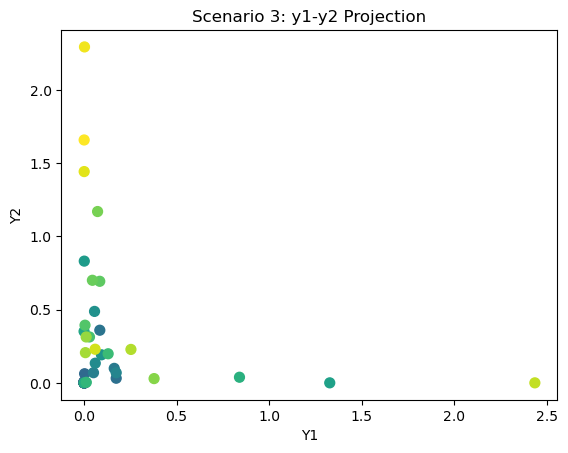

In [14]:
axis_1, axis_2 = projected_y[0], projected_y[1]
axis_1_name, axis_2_name = 'y1', 'y2'
sub_tdf = transformed_df[['y1', 'y2', 'x', 'class']]
# 建立一個新的圖表
plt.figure()
# 計算點的個數
num_points = len(axis_1)

# 生成由淺到深的顏色列表
colors = np.arange(num_points) / (num_points - 1)
# 繪製座標點
plt.scatter(axis_1, axis_2, marker='o', s=50, c=colors)  # s 是點的大小
# 設定顏色條
# plt.colorbar(label='Index')
# 設定圖表標題與軸標籤
# plt.title('座標圖')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.title(f'{sce}: {axis_1_name}-{axis_2_name} Projection')

# 加入圖例
# plt.legend()`

# 顯示圖表
plt.show()

In [15]:
data = {
    'y1': sub_tdf[axis_1_name],
    'y2': sub_tdf[axis_2_name],
    'class': sub_tdf['class']
}

df = pd.DataFrame(data)

In [16]:
# Group by class, sort by y1, and calculate index
def calc_index(group):
    group = group.sort_values(by=axis_1_name)
    group['index_value'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(0)
    return group
df_test = df[[axis_1_name, axis_2_name]]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index
df_test

,y1,y2,frontier,index
0,0.000485,8.422244e-04,-1,0
1,0.000054,8.356208e-04,-1,1
2,0.002205,7.879858e-04,-1,2
3,0.000135,5.951299e-04,-1,3
4,0.000519,3.497089e-05,-1,4
5,0.004476,3.008638e-04,-1,5
6,0.004366,7.179477e-04,-1,6
7,0.001071,1.184983e-03,-1,7
8,0.000805,2.811792e-03,-1,8
9,0.000357,1.918669e-03,-1,9


In [17]:
fix_index = df_test.index
while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[[axis_1_name]].T)+10, 
                y=np.array(tmp_df[[axis_2_name]].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)


Frontier 0
8 DMUs


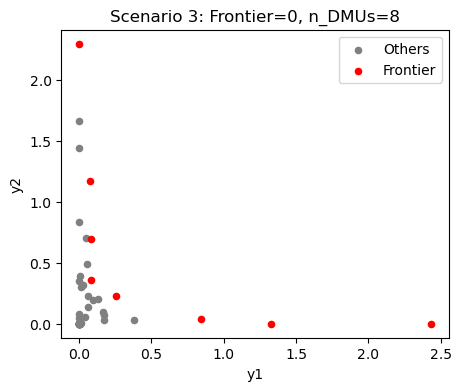

Frontier 1
10 DMUs


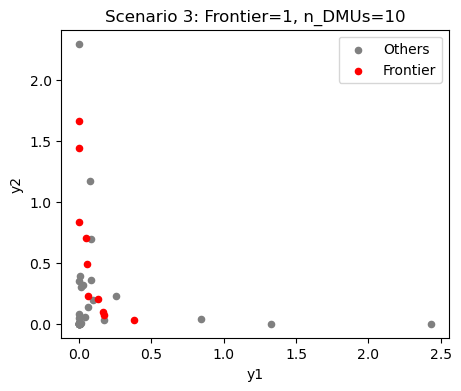

Frontier 2
4 DMUs


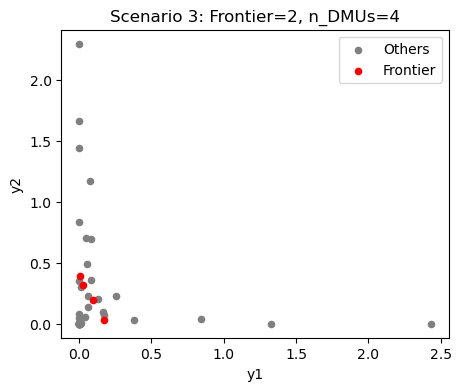

Frontier 3
3 DMUs


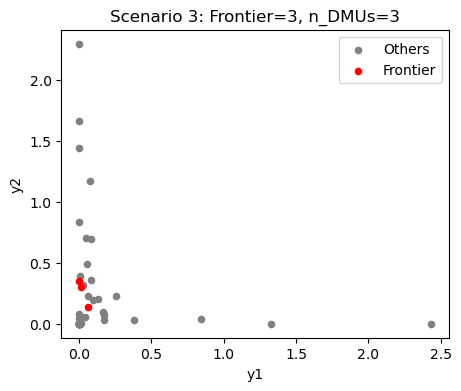

Frontier 4
2 DMUs


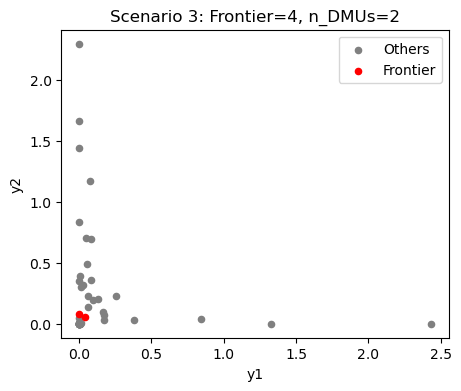

Frontier 5
2 DMUs


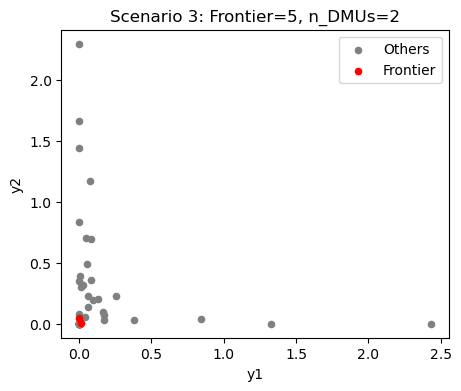

Frontier 6
6 DMUs


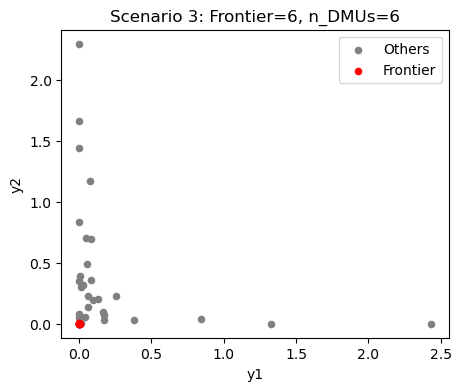

Frontier 7
4 DMUs


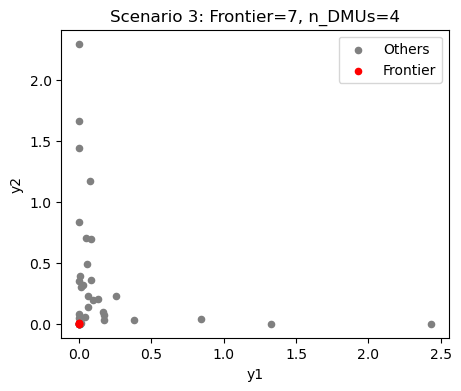

Frontier 8
1 DMUs


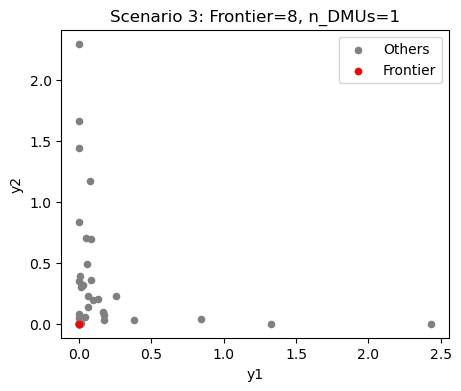

Frontier 9
3 DMUs


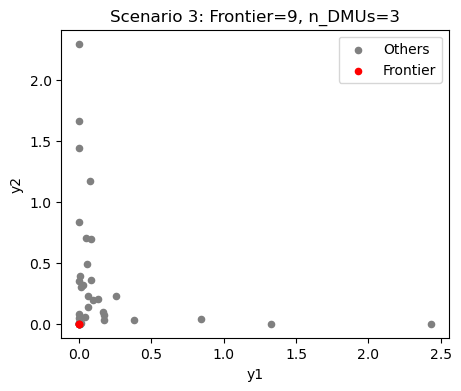

Frontier 10
1 DMUs


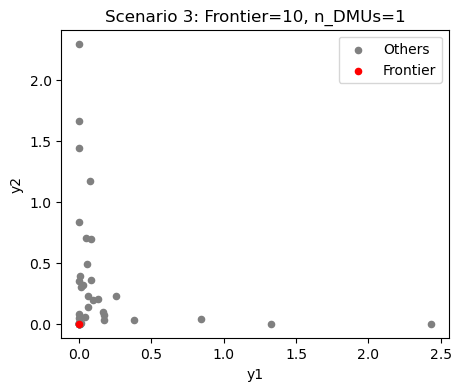

Frontier 11
1 DMUs


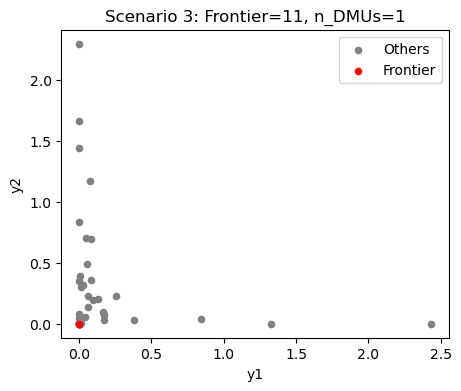

In [18]:
for i in range(len(df_test['frontier'].unique())):
    print('Frontier', i)
    tmp_0 = df_test[df_test['frontier']==i]
    tmp_1 = df_test[df_test['frontier']!=i]
    print(f'{tmp_0.shape[0]} DMUs')

    # Create the scatter plot
    plt.figure(figsize=(5, 4))
    plt.scatter(tmp_1[axis_1_name], tmp_1[axis_2_name], c='gray', label=f'Others', s=20)
    plt.scatter(tmp_0[axis_1_name], tmp_0[axis_2_name], c='red', label=f'Frontier', s=20)
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.title(f'{sce}: Frontier={i}, n_DMUs={tmp_0.shape[0]}')
    plt.legend()
    plt.show()
    

In [19]:
# Group by class, sort by y1, and calculate index
def cal_MRTS(group):
    group = group.sort_values(by=axis_1_name)
    group['MRTS'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(np.nan)
    return group

MRTS = df_test.groupby('frontier').apply(cal_MRTS)

result = MRTS[[axis_1_name, axis_2_name, 'MRTS']]
result.columns=[axis_1_name, axis_2_name, 'MRTS']
result.reset_index(inplace=True)

diff_list = result[result['frontier']==0]['MRTS'].diff()
import statistics
diff_ary = np.array(diff_list)
diff_ary = diff_ary[~np.isnan(diff_ary)]
# Calculate the mean of the list
mean = statistics.mean(diff_ary)

# Calculate the mean after removing the maximum and minimum values
mean_without_extremes = statistics.mean(sorted(diff_ary)[1:-1])

# Calculate the median of the list
median = statistics.median(diff_ary)

# Print the results
print("Mean:", mean)
print("Mean after removing extremes:", mean_without_extremes)
print("Median:", median)
if mean_without_extremes > 0:
    print('Negative Return to Scope')
elif mean_without_extremes == 0:
    print('Constant Return to Scope')
else:
    print('Positive Return to Scope')

Mean: 2.6510782528264882
Mean after removing extremes: -6.052858996485989
Median: 0.16199189520935361
Positive Return to Scope


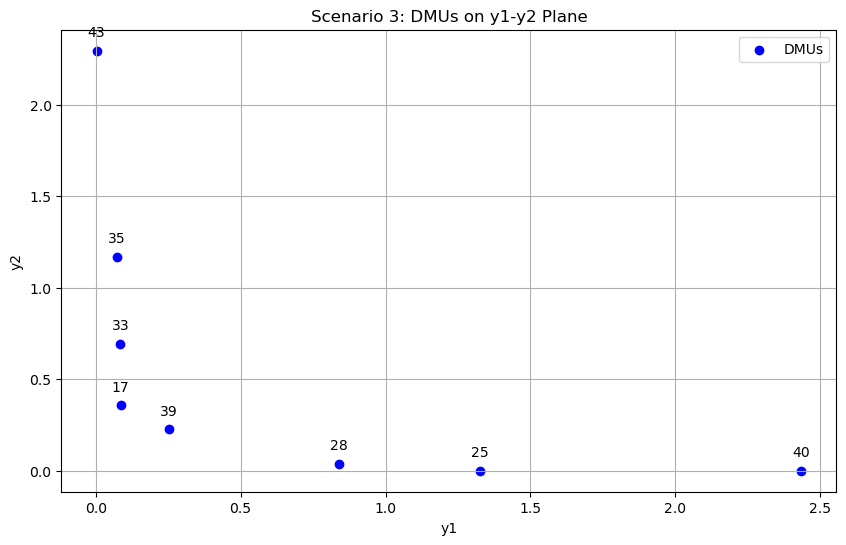

In [20]:
df_est = df_test[df_test['frontier']==0]
df_est
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'y1' column
df_sorted = df_est.sort_values(by=axis_1_name)

# Plot the DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMUs')
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title(f'{sce}: DMUs on {axis_1_name}-{axis_2_name} Plane')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()

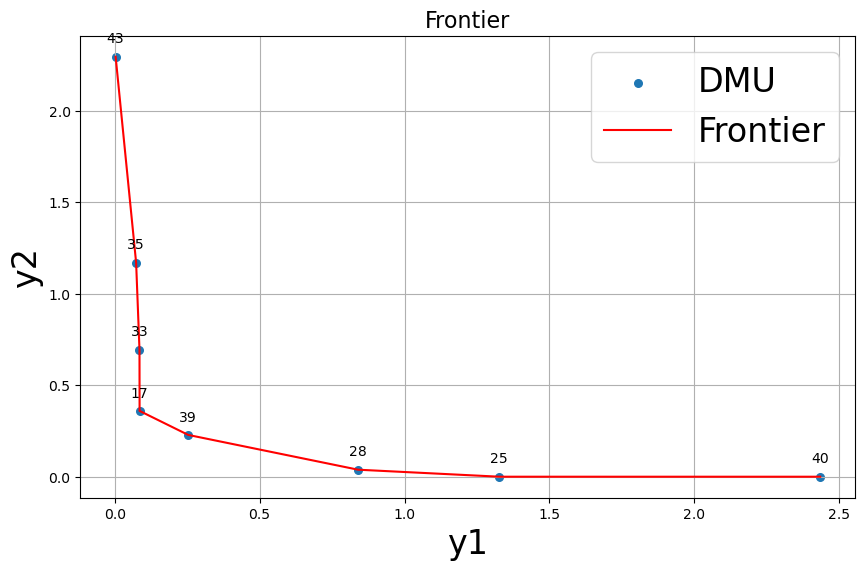

In [21]:
# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['y1'], df_sorted['y2'], marker='o', label='DMU', s=30)
plt.plot(df_sorted['y1'], df_sorted['y2'], c='r', label='Frontier')  # Add red line to legend
plt.xlabel('y1', fontsize=24)  # Increase font size for x-axis label
plt.ylabel('y2', fontsize=24)  # Increase font size for y-axis label
plt.title('Frontier', fontsize=16)  # Increase font size for the title

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted['y1'].iloc[i], df_sorted['y2'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize legend
plt.legend(fontsize=24)  # Increase font size for the legend
plt.grid(True)
plt.savefig('HighDPI/MarginalOutputNeg-1.png', dpi=300)
plt.show()


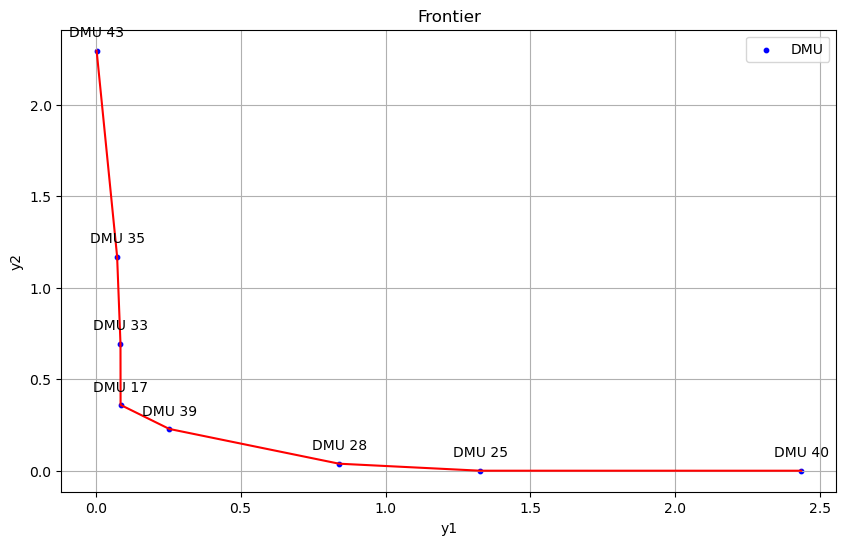

In [172]:
# Step 1: Identify the most left point and set its y2 value to the max y2 value in the dataset
df_sorted.iloc[0, df_sorted.columns.get_loc(axis_2_name)] = df_sorted[axis_2_name].max()

# Step 2: Identify the most right point and set its y1 value to the max y1 value in the dataset
df_sorted.iloc[-1, df_sorted.columns.get_loc(axis_1_name)] = df_sorted[axis_1_name].max()

# Display the modified DataFrame to confirm the changes
df_sorted.head(), df_sorted.tail()
# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMU', s=10)
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title('Frontier')

# Connect the points with straight lines
plt.plot(df_sorted[axis_1_name], df_sorted[axis_2_name], c='r')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()


In [173]:
# Initialize the variable to store the total Area-Under-Curve (AUC)
total_auc = 0.0

# Calculate the AUC by summing up the areas of trapezoids formed by adjacent points
for i in range(len(df_sorted) - 1):
#     print(f'DMU {i}')
    a = df_sorted[axis_2_name].iloc[i]  # Length of one parallel side
    b = df_sorted[axis_2_name].iloc[i+1]  # Length of the other parallel side
    h = df_sorted[axis_1_name].iloc[i+1] - df_sorted[axis_1_name].iloc[i]  # Height (difference in y1 values)
#     print(a, b, h)
    # Area of the trapezoid
    area = (a + b) * h / 2.0
    
    # Add the area to the total AUC
    total_auc += area
    if i == 0:
        total_auc += a * df_sorted[axis_1_name].iloc[i]

print(total_auc)
# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage = (total_auc / (max_y1 * max_y2)) * 100
# auc_percentage = 100 - auc_percentage
print(auc_percentage)


0.2783128782868856
4.983072408774171


In [174]:
auc_list = []
type_list = []
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0:
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    elif i == len(df_sorted)-1:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    print(curr_x, curr_y)
    print('RHS', rhs_x, rhs_y)
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - lhs_y) * (curr_x - lhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - lhs_y) + (rhs_y - lhs_y)) * (rhs_x - curr_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_pct = 0
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - rhs_y) * (curr_x - rhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - rhs_y) + (lhs_y - rhs_y)) * (curr_x - lhs_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_list.append(auc_pct)

DMU 0
0.0029452396363044953 2.2946364250309883
RHS 0.07361980087100373 1.1704498120967015
Slope:  0.0 -15.9065241197754
外凸
DMU 1
0.07361980087100373 1.1704498120967015
RHS 0.08526749178865378 0.6940717662770696
Slope:  -15.9065241197754 -40.89892573452165
外凸
DMU 2
0.08526749178865378 0.6940717662770696
RHS 0.08560685252375476 0.35997465485344027
Slope:  -40.89892573452165 -984.4895913612944
外凸
DMU 3
0.08560685252375476 0.35997465485344027
RHS 0.2536538487920158 0.22872655090513827
Slope:  -984.4895913612944 -0.7810202316189259
內凹
DMU 4
0.2536538487920158 0.22872655090513827
RHS 0.8395732281701365 0.03886617664612958
Slope:  -0.7810202316189259 -0.32403839323512645
內凹
DMU 5
0.8395732281701365 0.03886617664612958
RHS 1.3268434369826807 0.0005745090269759795
Slope:  -0.32403839323512645 -0.07858405239357581
內凹
DMU 6
1.3268434369826807 0.0005745090269759795
RHS 2.4340092343374535 0.0005140546561973391
Slope:  -0.07858405239357581 -5.460281641925465e-05
內凹
DMU 7
2.4340092343374535 0.0005140

In [175]:
df_sorted['scope'] = auc_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[axis_1_name, axis_2_name, 'scope']]

,y1,y2,scope
DMU 43,0.002945,2.294636,0.040006
DMU 35,0.073620,1.170450,0.156142
DMU 33,0.085267,0.694072,0.383913
DMU 17,0.085607,0.359975,0.715940
DMU 39,0.253654,0.228727,0.185851
DMU 28,0.839573,0.038866,0.286205
DMU 25,1.326843,0.000575,0.692817
DMU 40,2.434009,0.000514,0.894772


In [176]:
df_sorted['scope'] = auc_list
df_sorted['type'] = type_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[ 'type','scope']]

,type,scope
DMU 43,Positive,0.040006
DMU 35,Positive,0.156142
DMU 33,Positive,0.383913
DMU 17,Negative,0.715940
DMU 39,Negative,0.185851
DMU 28,Negative,0.286205
DMU 25,Negative,0.692817
DMU 40,Positive,0.894772


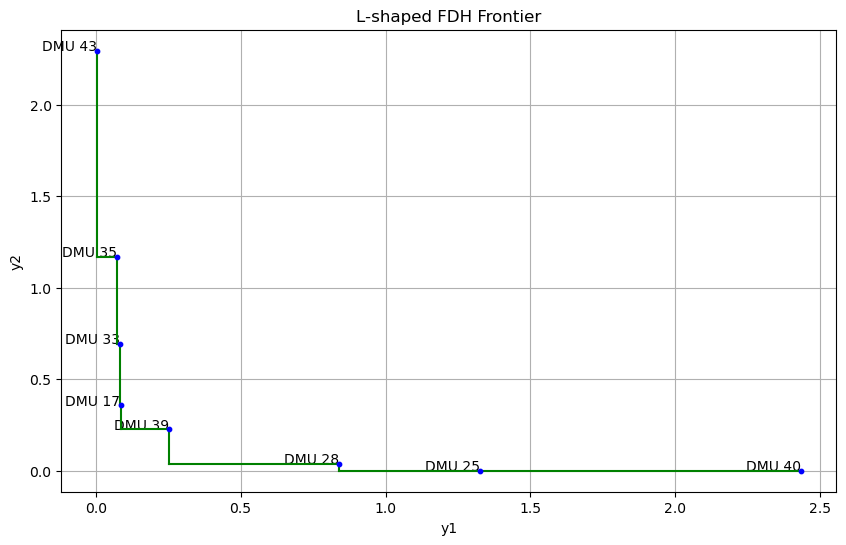

In [177]:
new_df = pd.DataFrame(df_sorted)

# We'll filter the data points that are on the second frontier
frontier_points = new_df[new_df['frontier'] == 0].sort_values(by=axis_1_name)

# Function to plot both L-shaped FDH frontiers on the same plot with different colors

def plot_combined_l_shaped_frontiers(frontier_df):
    plt.figure(figsize=(10, 6))

    # Plot the data points
    plt.scatter(frontier_df[axis_1_name], frontier_df[axis_2_name], color='blue', zorder=5, s=10)
    
    # Annotate the points with their DMU index
    for _, row in frontier_df.iterrows():
        plt.text(row[axis_1_name], row[axis_2_name], row['index'], fontsize=10, ha='right')
    
    # Plot the first L-shaped lines (original direction)
#     for i in range(len(frontier_df) - 1):
#         point1 = frontier_df.iloc[i]
#         point2 = frontier_df.iloc[i + 1]
#         plt.plot([point1[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point1[axis_2_name]], color='red', zorder=3)  # horizontal line
#         plt.plot([point2[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='red', zorder=3)  # vertical line

    # Plot the second L-shaped lines (reversed direction)
    for i in range(len(frontier_df) - 1):
        point1 = frontier_df.iloc[i]
        point2 = frontier_df.iloc[i + 1]
        plt.plot([point1[axis_1_name], point1[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # vertical line
        plt.plot([point1[axis_1_name], point2[axis_1_name]], [point2[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # horizontal line

    plt.title('L-shaped FDH Frontier')
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.grid(True)
    plt.show()

# Plot the combined L-shaped FDH frontiers
plot_combined_l_shaped_frontiers(frontier_points)


In [178]:
auc_1_list = []
auc_2_list = []
type_list = []
total_auc_fdh = 0
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0: # left-most point
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    elif i == len(df_sorted)-1: # right-most point
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0 # rhs point coordinate
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    width = curr_x - lhs_x
    height = curr_y
    total_auc_fdh += width * height
    # Calculate rectangles.
    a = lhs_y - curr_y
    b = curr_y - rhs_y
    c = curr_x - lhs_x
    d = rhs_x - curr_x
    
    total_rec_area = (a + b) * (c + d)
    bottom_left =  b * c
    top_right = a * d
    top_left = a * c
    bottom_right = b * d
    
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        auc_1 = top_right
        auc_2 = total_rec_area - bottom_left
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_1_list.append(auc_1_pct)
    auc_2_list.append(auc_2_pct)

DMU 0
Slope:  0.0 -15.9065241197754
外凸
DMU 1
Slope:  -15.9065241197754 -40.89892573452165
外凸
DMU 2
Slope:  -40.89892573452165 -984.4895913612944
外凸
DMU 3
Slope:  -984.4895913612944 -0.7810202316189259
內凹
DMU 4
Slope:  -0.7810202316189259 -0.32403839323512645
內凹
DMU 5
Slope:  -0.32403839323512645 -0.07858405239357581
內凹
DMU 6
Slope:  -0.07858405239357581 -5.460281641925465e-05
內凹
DMU 7
Slope:  -5.460281641925465e-05 -5.140546561973391e+46
外凸


In [179]:
# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage_fdh = (total_auc_fdh / (max_y1 * max_y2)) * 100
auc_percentage_fdh = auc_percentage_fdh
auc_percentage_fdh

2.860149715496495

In [180]:
df_sorted['FDH_scope'] = auc_1_list
df_sorted[['index', 'type', 'scope', 'FDH_scope']]

,index,type,scope,FDH_scope
DMU 43,DMU 43,Positive,0.040006,0.040006
DMU 35,DMU 35,Positive,0.156142,0.255520
DMU 33,DMU 33,Positive,0.383913,0.400553
DMU 17,DMU 17,Negative,0.715940,0.716508
DMU 39,DMU 39,Negative,0.185851,0.317634
DMU 28,DMU 28,Negative,0.286205,0.377836
DMU 25,DMU 25,Negative,0.692817,0.693299
DMU 40,DMU 40,Positive,0.894772,0.894772


In [181]:
print(auc_percentage)
print(auc_percentage_fdh)

4.983072408774171
2.860149715496495


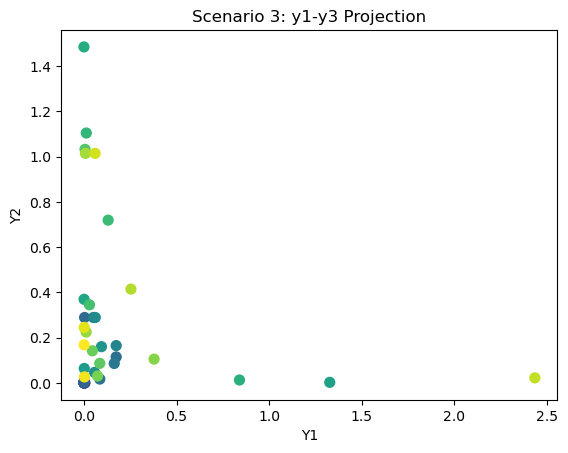

In [33]:
axis_1, axis_2 = projected_y[0], projected_y[2]
axis_1_name, axis_2_name = 'y1', 'y3'
sub_tdf = transformed_df[['y1', 'y3', 'x', 'class']]
# 建立一個新的圖表
plt.figure()
# 計算點的個數
num_points = len(axis_1)

# 生成由淺到深的顏色列表
colors = np.arange(num_points) / (num_points - 1)
# 繪製座標點
plt.scatter(axis_1, axis_2, marker='o', s=50, c=colors)  # s 是點的大小
# 設定顏色條
# plt.colorbar(label='Index')
# 設定圖表標題與軸標籤
# plt.title('座標圖')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.title(f'{sce}: {axis_1_name}-{axis_2_name} Projection')

# 加入圖例
# plt.legend()

# 顯示圖表
plt.show()

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
Frontier 0
7 DMUs


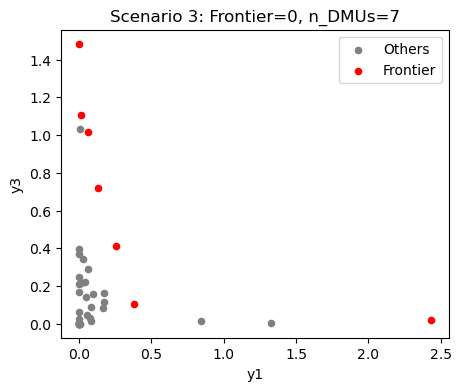

Mean: 5.978922377364673
Mean after removing extremes: 1.3837049170475095
Median: 1.7166558379363708
Negative Return to Scope


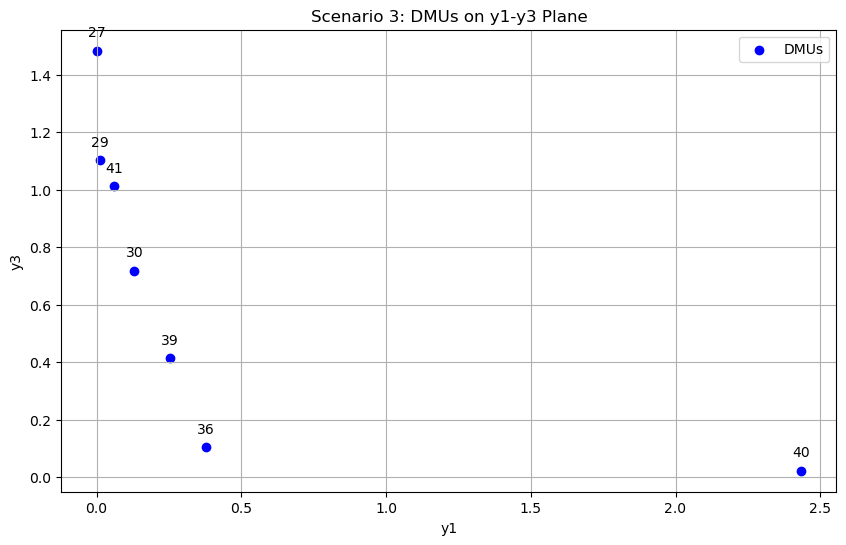

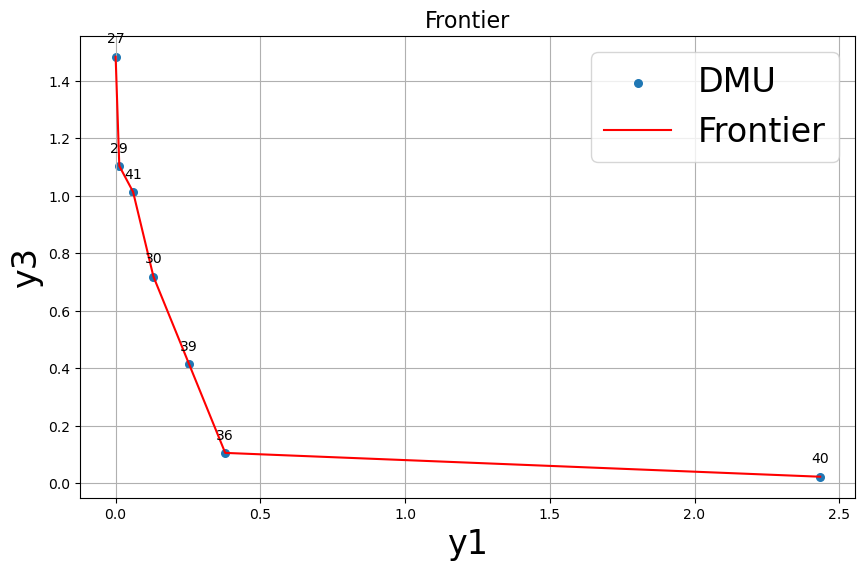

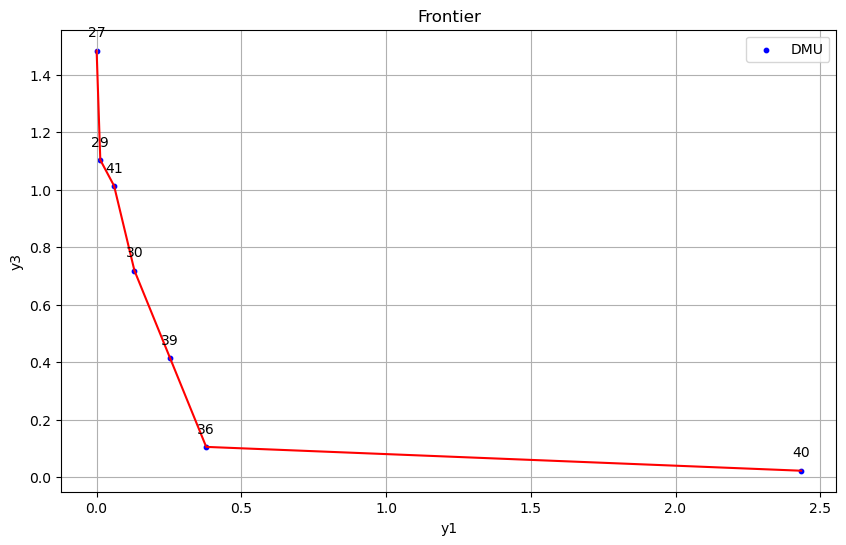

0.3609786991036493
9.992718947477917
DMU 0
1.0018707053103826e-05 1.4841427715307292
RHS 0.0127131227434978 1.1038757626916589
Slope:  0.0 -29.93496768570103
外凸
DMU 1
0.0127131227434978 1.1038757626916589
RHS 0.0602361598824265 1.0139331052724954
Slope:  -29.93496768570103 -1.8926117275759424
內凹
DMU 2
0.0602361598824265 1.0139331052724954
RHS 0.1306003307514518 0.719003755298387
Slope:  -1.8926117275759424 -4.191470550020194
外凸
DMU 3
0.1306003307514518 0.719003755298387
RHS 0.2536538487920158 0.4144690984779271
Slope:  -4.191470550020194 -2.474814712083823
內凹
DMU 4
0.2536538487920158 0.4144690984779271
RHS 0.3786025075807833 0.1052222101067801
Slope:  -2.474814712083823 -2.4749916595258994
外凸
DMU 5
0.3786025075807833 0.1052222101067801
RHS 2.4340092343374535 0.0222746296299888
Slope:  -2.4749916595258994 -0.04035579887766469
內凹
DMU 6
2.4340092343374535 0.0222746296299888
RHS 2.4340092343374535 0
Slope:  -0.04035579887766469 -2.22746296299888e+48
外凸


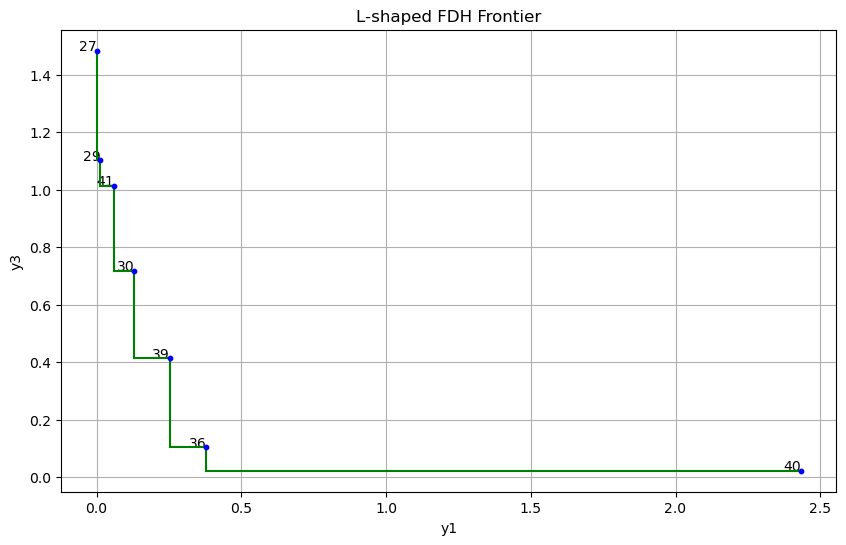

DMU 0
Slope:  0.0 -29.93496768570103
外凸
DMU 1
Slope:  -29.93496768570103 -1.8926117275759424
內凹
DMU 2
Slope:  -1.8926117275759424 -4.191470550020194
外凸
DMU 3
Slope:  -4.191470550020194 -2.474814712083823
內凹
DMU 4
Slope:  -2.474814712083823 -2.4749916595258994
外凸
DMU 5
Slope:  -2.4749916595258994 -0.04035579887766469
內凹
DMU 6
Slope:  -0.04035579887766469 -2.22746296299888e+48
外凸


6.166161515751978

In [34]:
data = {
    'y1': sub_tdf[axis_1_name],
    'y3': sub_tdf[axis_2_name],
    'class': sub_tdf['class']
}

df = pd.DataFrame(data)

# Group by class, sort by y1, and calculate index
def calc_index(group):
    group = group.sort_values(by=axis_1_name)
    group['index_value'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(0)
    return group
df_test = df[[axis_1_name, axis_2_name]]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index
df_test

fix_index = df_test.index
while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[[axis_1_name]].T)+10, 
                y=np.array(tmp_df[[axis_2_name]].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    break

for i in range(len(df_test['frontier'].unique())):
    print('Frontier', i)
    tmp_0 = df_test[df_test['frontier']==i]
    tmp_1 = df_test[df_test['frontier']!=i]
    print(f'{tmp_0.shape[0]} DMUs')

    # Create the scatter plot
    plt.figure(figsize=(5, 4))
    plt.scatter(tmp_1[axis_1_name], tmp_1[axis_2_name], c='gray', label=f'Others', s=20)
    plt.scatter(tmp_0[axis_1_name], tmp_0[axis_2_name], c='red', label=f'Frontier', s=20)
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.title(f'{sce}: Frontier={i}, n_DMUs={tmp_0.shape[0]}')
    plt.legend()
    plt.show()
    break

# Group by class, sort by y1, and calculate index
def cal_MRTS(group):
    group = group.sort_values(by=axis_1_name)
    group['MRTS'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(np.nan)
    return group

MRTS = df_test.groupby('frontier').apply(cal_MRTS)

result = MRTS[[axis_1_name, axis_2_name, 'MRTS']]
result.columns=[axis_1_name, axis_2_name, 'MRTS']
result.reset_index(inplace=True)

diff_list = result[result['frontier']==0]['MRTS'].diff()
import statistics
diff_ary = np.array(diff_list)
diff_ary = diff_ary[~np.isnan(diff_ary)]
# Calculate the mean of the list
mean = statistics.mean(diff_ary)

# Calculate the mean after removing the maximum and minimum values
mean_without_extremes = statistics.mean(sorted(diff_ary)[1:-1])

# Calculate the median of the list
median = statistics.median(diff_ary)

# Print the results
print("Mean:", mean)
print("Mean after removing extremes:", mean_without_extremes)
print("Median:", median)
if mean_without_extremes > 0:
    print('Negative Return to Scope')
elif mean_without_extremes == 0:
    print('Constant Return to Scope')
else:
    print('Positive Return to Scope')

df_est = df_test[df_test['frontier']==0]
df_est
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'y1' column
df_sorted = df_est.sort_values(by=axis_1_name)

# Plot the DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMUs')
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title(f'{sce}: DMUs on {axis_1_name}-{axis_2_name} Plane')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()

# Step 1: Identify the most left point and set its y2 value to the max y2 value in the dataset
df_sorted.iloc[0, df_sorted.columns.get_loc(axis_2_name)] = df_sorted[axis_2_name].max()

# Step 2: Identify the most right point and set its y1 value to the max y1 value in the dataset
df_sorted.iloc[-1, df_sorted.columns.get_loc(axis_1_name)] = df_sorted[axis_1_name].max()

# Display the modified DataFrame to confirm the changes
df_sorted.head(), df_sorted.tail()
# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['y1'], df_sorted['y3'], marker='o', label='DMU', s=30)
plt.plot(df_sorted['y1'], df_sorted['y3'], c='r', label='Frontier')  # Add red line to legend
plt.xlabel('y1', fontsize=24)  # Increase font size for x-axis label
plt.ylabel('y3', fontsize=24)  # Increase font size for y-axis label
plt.title('Frontier', fontsize=16)  # Increase font size for the title

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted['y1'].iloc[i], df_sorted['y3'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize legend
plt.legend(fontsize=24)  # Increase font size for the legend
plt.grid(True)
plt.savefig('HighDPI/MarginalOutputNeg-2.png', dpi=300)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMU', s=10)
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title('Frontier')

# Connect the points with straight lines
plt.plot(df_sorted[axis_1_name], df_sorted[axis_2_name], c='r')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()


# Initialize the variable to store the total Area-Under-Curve (AUC)
total_auc = 0.0

# Calculate the AUC by summing up the areas of trapezoids formed by adjacent points
for i in range(len(df_sorted) - 1):
#     print(f'DMU {i}')
    a = df_sorted[axis_2_name].iloc[i]  # Length of one parallel side
    b = df_sorted[axis_2_name].iloc[i+1]  # Length of the other parallel side
    h = df_sorted[axis_1_name].iloc[i+1] - df_sorted[axis_1_name].iloc[i]  # Height (difference in y1 values)
#     print(a, b, h)
    # Area of the trapezoid
    area = (a + b) * h / 2.0
    
    # Add the area to the total AUC
    total_auc += area
    if i == 0:
        total_auc += a * df_sorted[axis_1_name].iloc[i]

print(total_auc)
# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage = (total_auc / (max_y1 * max_y2)) * 100
# auc_percentage = 100 - auc_percentage
print(auc_percentage)


auc_list = []
type_list = []
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0:
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    elif i == len(df_sorted)-1:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    print(curr_x, curr_y)
    print('RHS', rhs_x, rhs_y)
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - lhs_y) * (curr_x - lhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - lhs_y) + (rhs_y - lhs_y)) * (rhs_x - curr_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_pct = 0
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - rhs_y) * (curr_x - rhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - rhs_y) + (lhs_y - rhs_y)) * (curr_x - lhs_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_list.append(auc_pct)

df_sorted['scope'] = auc_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[axis_1_name, axis_2_name, 'scope']]


df_sorted['scope'] = auc_list
df_sorted['type'] = type_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[ 'type','scope']]

new_df = pd.DataFrame(df_sorted)

# We'll filter the data points that are on the second frontier
frontier_points = new_df[new_df['frontier'] == 0].sort_values(by=axis_1_name)

# Function to plot both L-shaped FDH frontiers on the same plot with different colors

def plot_combined_l_shaped_frontiers(frontier_df):
    plt.figure(figsize=(10, 6))

    # Plot the data points
    plt.scatter(frontier_df[axis_1_name], frontier_df[axis_2_name], color='blue', zorder=5, s=10)
    
    # Annotate the points with their DMU index
    for _, row in frontier_df.iterrows():
        plt.text(row[axis_1_name], row[axis_2_name], row['index'], fontsize=10, ha='right')
    
    # Plot the first L-shaped lines (original direction)
#     for i in range(len(frontier_df) - 1):
#         point1 = frontier_df.iloc[i]
#         point2 = frontier_df.iloc[i + 1]
#         plt.plot([point1[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point1[axis_2_name]], color='red', zorder=3)  # horizontal line
#         plt.plot([point2[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='red', zorder=3)  # vertical line

    # Plot the second L-shaped lines (reversed direction)
    for i in range(len(frontier_df) - 1):
        point1 = frontier_df.iloc[i]
        point2 = frontier_df.iloc[i + 1]
        plt.plot([point1[axis_1_name], point1[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # vertical line
        plt.plot([point1[axis_1_name], point2[axis_1_name]], [point2[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # horizontal line

    plt.title('L-shaped FDH Frontier')
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.grid(True)
    plt.show()

# Plot the combined L-shaped FDH frontiers
plot_combined_l_shaped_frontiers(frontier_points)


auc_1_list = []
auc_2_list = []
type_list = []
total_auc_fdh = 0
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0: # left-most point
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    elif i == len(df_sorted)-1: # right-most point
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0 # rhs point coordinate
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    width = curr_x - lhs_x
    height = curr_y
    total_auc_fdh += width * height
    # Calculate rectangles.
    a = lhs_y - curr_y
    b = curr_y - rhs_y
    c = curr_x - lhs_x
    d = rhs_x - curr_x
    
    total_rec_area = (a + b) * (c + d)
    bottom_left =  b * c
    top_right = a * d
    top_left = a * c
    bottom_right = b * d
    
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        auc_1 = top_right
        auc_2 = total_rec_area - bottom_left
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_1_list.append(auc_1_pct)
    auc_2_list.append(auc_2_pct)

# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage_fdh = (total_auc_fdh / (max_y1 * max_y2)) * 100
auc_percentage_fdh = auc_percentage_fdh
auc_percentage_fdh

In [25]:
df_sorted['FDH_scope'] = auc_1_list
df_sorted[['index', 'type', 'scope', 'FDH_scope']]

,index,type,scope,FDH_scope
27,27,Positive,0.000788,0.000788
29,29,Negative,0.597795,0.638140
41,41,Positive,0.169428,0.308915
30,30,Negative,0.128195,0.313006
39,39,Positive,0.000018,0.249994
36,36,Negative,0.731197,0.743318
40,40,Positive,0.211691,0.211691


In [26]:
print(auc_percentage)
print(auc_percentage_fdh)

9.992718947477917
6.166161515751978


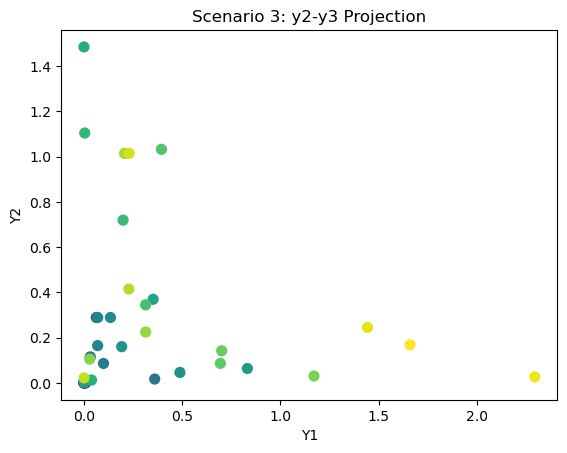

In [27]:
axis_1, axis_2 = projected_y[1], projected_y[2]
axis_1_name, axis_2_name = 'y2', 'y3'
sub_tdf = transformed_df[['y2', 'y3', 'x', 'class']]
# 建立一個新的圖表
plt.figure()
# 計算點的個數
num_points = len(axis_1)

# 生成由淺到深的顏色列表
colors = np.arange(num_points) / (num_points - 1)
# 繪製座標點
plt.scatter(axis_1, axis_2, marker='o', s=50, c=colors)  # s 是點的大小
# 設定顏色條
# plt.colorbar(label='Index')
# 設定圖表標題與軸標籤
# plt.title('座標圖')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.title(f'{sce}: {axis_1_name}-{axis_2_name} Projection')

# 加入圖例
# plt.legend()

# 顯示圖表
plt.show()

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
Frontier 0
6 DMUs


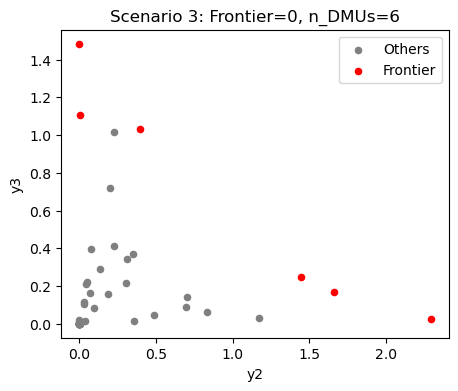

Mean: 23.78326943819962
Mean after removing extremes: 0.2633490576110115
Median: 0.2633490576110115
Negative Return to Scope


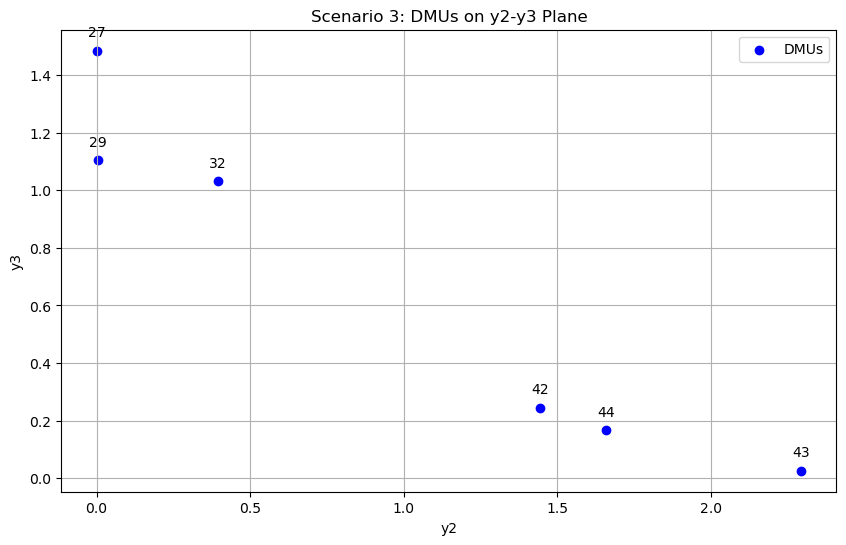

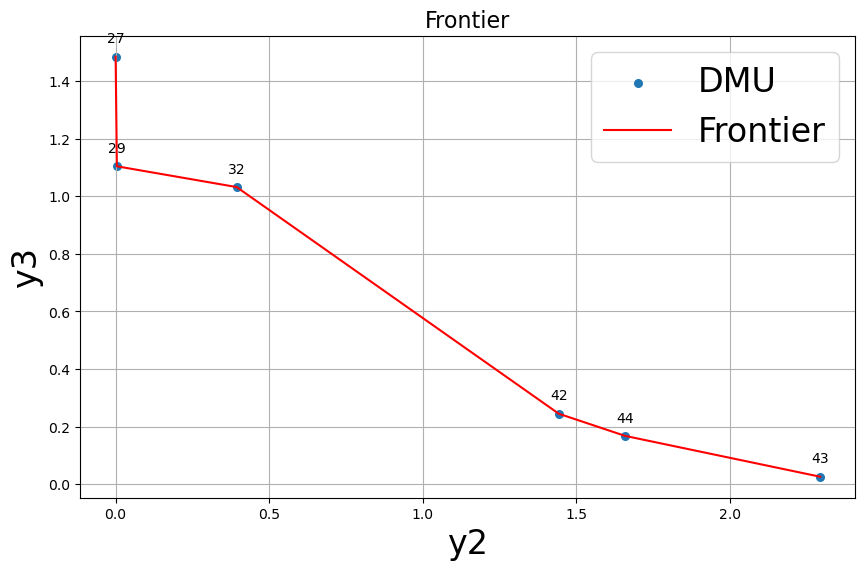

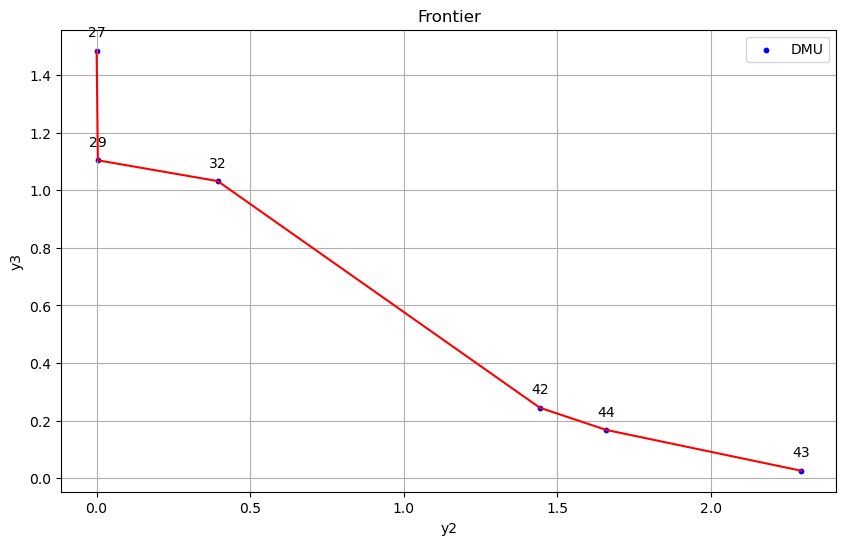

1.1982732020591602
35.185707045518846
DMU 0
2.87853248477868e-05 1.4841427715307292
RHS 0.0040166453170371 1.1038757626916589
Slope:  0.0 -95.35615833651818
外凸
DMU 1
0.0040166453170371 1.1038757626916589
RHS 0.3942515319913983 1.0317741307912338
Slope:  -95.35615833651818 -0.18476470034467118
內凹
DMU 2
0.3942515319913983 1.0317741307912338
RHS 1.4433558021131028 0.2451780960851785
Slope:  -0.18476470034467118 -0.749778698941721
外凸
DMU 3
1.4433558021131028 0.2451780960851785
RHS 1.6591443756315798 0.1683267902767626
Slope:  -0.749778698941721 -0.3561416832936961
內凹
DMU 4
1.6591443756315798 0.1683267902767626
RHS 2.2946364250309883 0.0265608529475154
Slope:  -0.3561416832936961 -0.22308058371969797
內凹
DMU 5
2.2946364250309883 0.0265608529475154
RHS 2.2946364250309883 0
Slope:  -0.22308058371969797 -2.65608529475154e+48
外凸


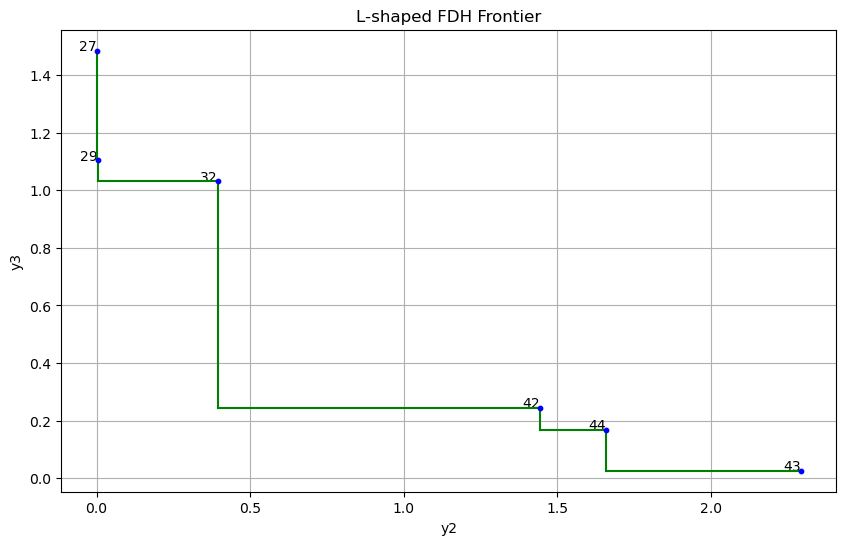

DMU 0
Slope:  0.0 -95.35615833651818
外凸
DMU 1
Slope:  -95.35615833651818 -0.18476470034467118
內凹
DMU 2
Slope:  -0.18476470034467118 -0.749778698941721
外凸
DMU 3
Slope:  -0.749778698941721 -0.3561416832936961
內凹
DMU 4
Slope:  -0.3561416832936961 -0.22308058371969797
內凹
DMU 5
Slope:  -0.22308058371969797 -2.65608529475154e+48
外凸


21.068399383652743

In [28]:
data = {
    axis_1_name: sub_tdf[axis_1_name],
    axis_2_name: sub_tdf[axis_2_name],
    'class': sub_tdf['class']
}

df = pd.DataFrame(data)

# Group by class, sort by y1, and calculate index
def calc_index(group):
    group = group.sort_values(by=axis_1_name)
    group['index_value'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(0)
    return group
df_test = df[[axis_1_name, axis_2_name]]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index
df_test

fix_index = df_test.index
while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[[axis_1_name]].T)+10, 
                y=np.array(tmp_df[[axis_2_name]].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    break

for i in range(len(df_test['frontier'].unique())):
    print('Frontier', i)
    tmp_0 = df_test[df_test['frontier']==i]
    tmp_1 = df_test[df_test['frontier']!=i]
    print(f'{tmp_0.shape[0]} DMUs')

    # Create the scatter plot
    plt.figure(figsize=(5, 4))
    plt.scatter(tmp_1[axis_1_name], tmp_1[axis_2_name], c='gray', label=f'Others', s=20)
    plt.scatter(tmp_0[axis_1_name], tmp_0[axis_2_name], c='red', label=f'Frontier', s=20)
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.title(f'{sce}: Frontier={i}, n_DMUs={tmp_0.shape[0]}')
    plt.legend()
    plt.show()
    break

# Group by class, sort by y1, and calculate index
def cal_MRTS(group):
    group = group.sort_values(by=axis_1_name)
    group['MRTS'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(np.nan)
    return group

MRTS = df_test.groupby('frontier').apply(cal_MRTS)

result = MRTS[[axis_1_name, axis_2_name, 'MRTS']]
result.columns=[axis_1_name, axis_2_name, 'MRTS']
result.reset_index(inplace=True)

diff_list = result[result['frontier']==0]['MRTS'].diff()
import statistics
diff_ary = np.array(diff_list)
diff_ary = diff_ary[~np.isnan(diff_ary)]
# Calculate the mean of the list
mean = statistics.mean(diff_ary)

# Calculate the mean after removing the maximum and minimum values
mean_without_extremes = statistics.mean(sorted(diff_ary)[1:-1])

# Calculate the median of the list
median = statistics.median(diff_ary)

# Print the results
print("Mean:", mean)
print("Mean after removing extremes:", mean_without_extremes)
print("Median:", median)
if mean_without_extremes > 0:
    print('Negative Return to Scope')
elif mean_without_extremes == 0:
    print('Constant Return to Scope')
else:
    print('Positive Return to Scope')

df_est = df_test[df_test['frontier']==0]
df_est
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'y1' column
df_sorted = df_est.sort_values(by=axis_1_name)

# Plot the DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMUs')
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title(f'{sce}: DMUs on {axis_1_name}-{axis_2_name} Plane')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()

# Step 1: Identify the most left point and set its y2 value to the max y2 value in the dataset
df_sorted.iloc[0, df_sorted.columns.get_loc(axis_2_name)] = df_sorted[axis_2_name].max()

# Step 2: Identify the most right point and set its y1 value to the max y1 value in the dataset
df_sorted.iloc[-1, df_sorted.columns.get_loc(axis_1_name)] = df_sorted[axis_1_name].max()

# Display the modified DataFrame to confirm the changes
df_sorted.head(), df_sorted.tail()
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['y2'], df_sorted['y3'], marker='o', label='DMU', s=30)
plt.plot(df_sorted['y2'], df_sorted['y3'], c='r', label='Frontier')  # Add red line to legend
plt.xlabel('y2', fontsize=24)  # Increase font size for x-axis label
plt.ylabel('y3', fontsize=24)  # Increase font size for y-axis label
plt.title('Frontier', fontsize=16)  # Increase font size for the title

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted['y2'].iloc[i], df_sorted['y3'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize legend
plt.legend(fontsize=24)  # Increase font size for the legend
plt.grid(True)
plt.savefig('HighDPI/MarginalOutputNeg-3.png', dpi=300)
plt.show()
# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMU', s=10)
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title('Frontier')

# Connect the points with straight lines
plt.plot(df_sorted[axis_1_name], df_sorted[axis_2_name], c='r')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()


# Initialize the variable to store the total Area-Under-Curve (AUC)
total_auc = 0.0

# Calculate the AUC by summing up the areas of trapezoids formed by adjacent points
for i in range(len(df_sorted) - 1):
#     print(f'DMU {i}')
    a = df_sorted[axis_2_name].iloc[i]  # Length of one parallel side
    b = df_sorted[axis_2_name].iloc[i+1]  # Length of the other parallel side
    h = df_sorted[axis_1_name].iloc[i+1] - df_sorted[axis_1_name].iloc[i]  # Height (difference in y1 values)
#     print(a, b, h)
    # Area of the trapezoid
    area = (a + b) * h / 2.0
    
    # Add the area to the total AUC
    total_auc += area
    if i == 0:
        total_auc += a * df_sorted[axis_1_name].iloc[i]

print(total_auc)
# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage = (total_auc / (max_y1 * max_y2)) * 100
# auc_percentage = 100 - auc_percentage
print(auc_percentage)


auc_list = []
type_list = []
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0:
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    elif i == len(df_sorted)-1:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    print(curr_x, curr_y)
    print('RHS', rhs_x, rhs_y)
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - lhs_y) * (curr_x - lhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - lhs_y) + (rhs_y - lhs_y)) * (rhs_x - curr_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_pct = 0
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - rhs_y) * (curr_x - rhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - rhs_y) + (lhs_y - rhs_y)) * (curr_x - lhs_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_list.append(auc_pct)

df_sorted['scope'] = auc_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[axis_1_name, axis_2_name, 'scope']]


df_sorted['scope'] = auc_list
df_sorted['type'] = type_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[ 'type','scope']]

new_df = pd.DataFrame(df_sorted)

# We'll filter the data points that are on the second frontier
frontier_points = new_df[new_df['frontier'] == 0].sort_values(by=axis_1_name)

# Function to plot both L-shaped FDH frontiers on the same plot with different colors

def plot_combined_l_shaped_frontiers(frontier_df):
    plt.figure(figsize=(10, 6))

    # Plot the data points
    plt.scatter(frontier_df[axis_1_name], frontier_df[axis_2_name], color='blue', zorder=5, s=10)
    
    # Annotate the points with their DMU index
    for _, row in frontier_df.iterrows():
        plt.text(row[axis_1_name], row[axis_2_name], row['index'], fontsize=10, ha='right')
    
    # Plot the first L-shaped lines (original direction)
#     for i in range(len(frontier_df) - 1):
#         point1 = frontier_df.iloc[i]
#         point2 = frontier_df.iloc[i + 1]
#         plt.plot([point1[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point1[axis_2_name]], color='red', zorder=3)  # horizontal line
#         plt.plot([point2[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='red', zorder=3)  # vertical line

    # Plot the second L-shaped lines (reversed direction)
    for i in range(len(frontier_df) - 1):
        point1 = frontier_df.iloc[i]
        point2 = frontier_df.iloc[i + 1]
        plt.plot([point1[axis_1_name], point1[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # vertical line
        plt.plot([point1[axis_1_name], point2[axis_1_name]], [point2[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # horizontal line

    plt.title('L-shaped FDH Frontier')
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.grid(True)
    plt.show()

# Plot the combined L-shaped FDH frontiers
plot_combined_l_shaped_frontiers(frontier_points)


auc_1_list = []
auc_2_list = []
type_list = []
total_auc_fdh = 0
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0: # left-most point
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    elif i == len(df_sorted)-1: # right-most point
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0 # rhs point coordinate
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    width = curr_x - lhs_x
    height = curr_y
    total_auc_fdh += width * height
    # Calculate rectangles.
    a = lhs_y - curr_y
    b = curr_y - rhs_y
    c = curr_x - lhs_x
    d = rhs_x - curr_x
    
    total_rec_area = (a + b) * (c + d)
    bottom_left =  b * c
    top_right = a * d
    top_left = a * c
    bottom_right = b * d
    
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        auc_1 = top_right
        auc_2 = total_rec_area - bottom_left
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_1_list.append(auc_1_pct)
    auc_2_list.append(auc_2_pct)

# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage_fdh = (total_auc_fdh / (max_y1 * max_y2)) * 100
auc_percentage_fdh = auc_percentage_fdh
auc_percentage_fdh

In [29]:
df_sorted['FDH_scope'] = auc_1_list
df_sorted[['index', 'type', 'scope', 'FDH_scope']]

,index,type,scope,FDH_scope
27,27,Positive,0.007167,0.007167
29,29,Negative,0.830497,0.832110
32,32,Positive,0.187155,0.248356
42,42,Negative,0.081593,0.155414
44,44,Negative,0.098047,0.262424
43,43,Positive,0.157793,0.157793


In [30]:
print(auc_percentage)
print(auc_percentage_fdh)

35.185707045518846
21.068399383652743


In [31]:
df_sorted

,y2,y3,frontier,index,scope,overall_scope,type,FDH_scope
27,0.000029,1.484143,0,27,0.007167,0.351857,Positive,0.007167
29,0.004017,1.103876,0,29,0.830497,0.351857,Negative,0.832110
32,0.394252,1.031774,0,32,0.187155,0.351857,Positive,0.248356
42,1.443356,0.245178,0,42,0.081593,0.351857,Negative,0.155414
44,1.659144,0.168327,0,44,0.098047,0.351857,Negative,0.262424
43,2.294636,0.026561,0,43,0.157793,0.351857,Positive,0.157793


In [32]:
import statsmodels.formula.api as sm

df_test

,y2,y3,frontier,index
0,8.422244e-04,0.000705,-1,0
1,8.356208e-04,0.001159,-1,1
2,7.879858e-04,0.000340,-1,2
3,5.951299e-04,0.000348,-1,3
4,3.497089e-05,0.003366,-1,4
5,3.008638e-04,0.000046,-1,5
6,7.179477e-04,0.000027,-1,6
7,1.184983e-03,0.001007,-1,7
8,2.811792e-03,0.000339,-1,8
9,1.918669e-03,0.000193,-1,9
